In [109]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [110]:
X_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/labels_test.csv', delimiter = ',')

In [111]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [112]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


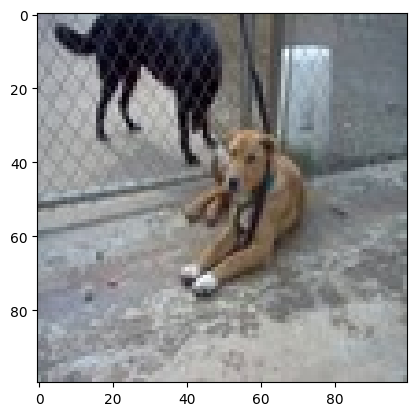

In [113]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [114]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [115]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [123]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 21s 661ms/step - loss: 0.1493 - accuracy: 0.9495
Epoch 2/5
32/32 [==============================] - 23s 717ms/step - loss: 0.1174 - accuracy: 0.9685
Epoch 3/5
32/32 [==============================] - 21s 666ms/step - loss: 0.0808 - accuracy: 0.9780
Epoch 4/5
32/32 [==============================] - 22s 702ms/step - loss: 0.0637 - accuracy: 0.9885
Epoch 5/5
32/32 [==============================] - 21s 650ms/step - loss: 0.0472 - accuracy: 0.9900


In [125]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 88ms/step - loss: 1.0688 - accuracy: 0.6725


[1.0687965154647827, 0.6725000143051147]

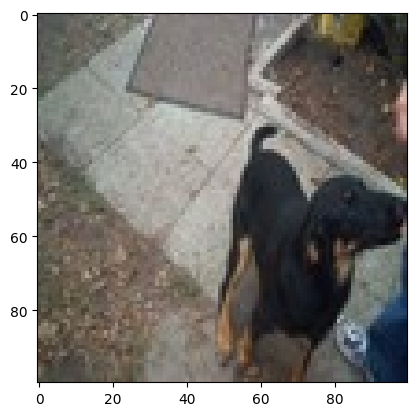

1/1 [==============================] - 0s 30ms/step
Our model says it is a : dog


In [153]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)